# World Happiness Report

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt        
import plotly.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected=True)

In [3]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Dataset Description

In [3]:
df_2015 = pd.read_csv(r'2015.csv')
df_2016 = pd.read_csv(r'2016.csv')
df_2017 = pd.read_csv(r'2017.csv')

In [12]:
df_2015.info()
df_2016.info()
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                        

### Dealing with missing values

In [35]:
df_2015.dropna()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


### Statistics of each variable

In [14]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Remove unnecessary columns

In [36]:
df_2015=df_2015.drop('Standard Error', axis=1)
df_2015=df_2015.drop('Dystopia Residual', axis=1)

### Frequency of each column

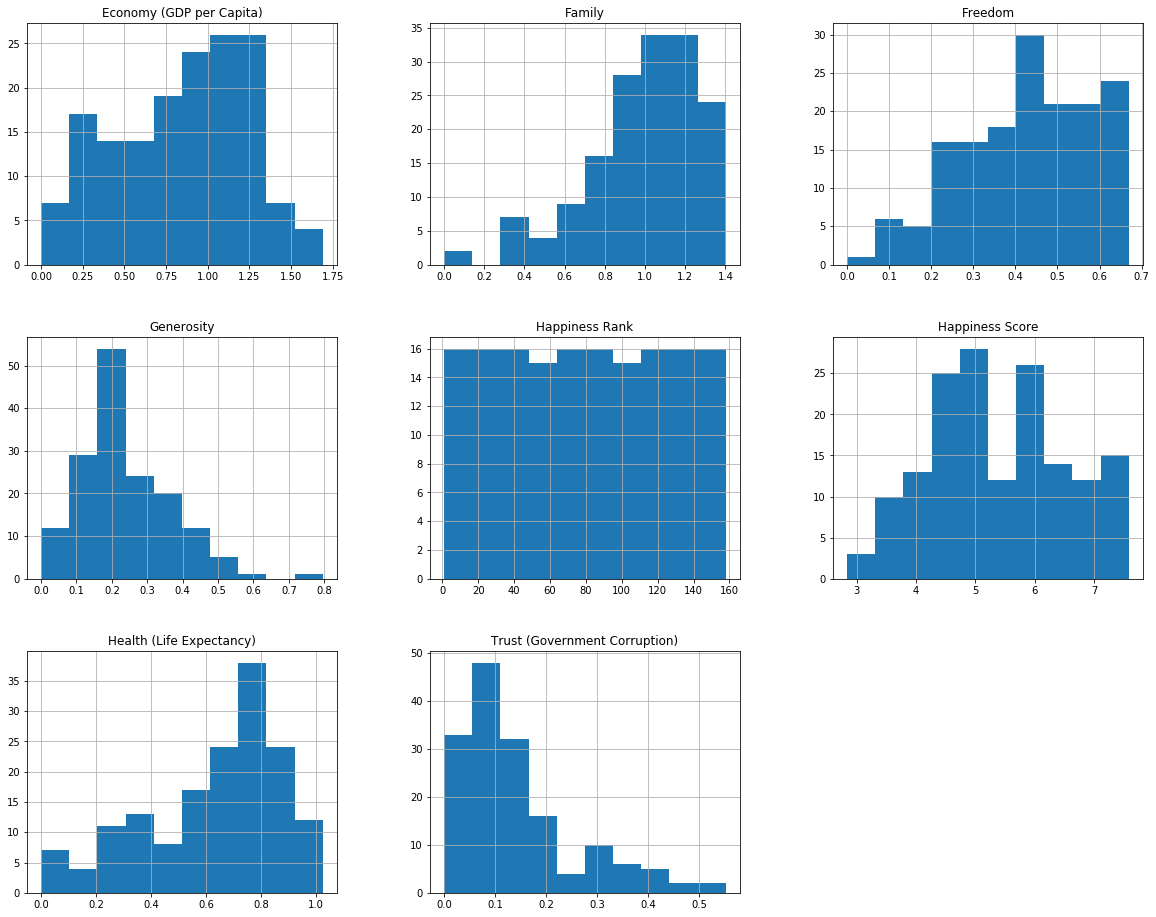

In [37]:
df_2015.hist(figsize = (20,16))
plt.show()

## Relation between variables

### Pairplot

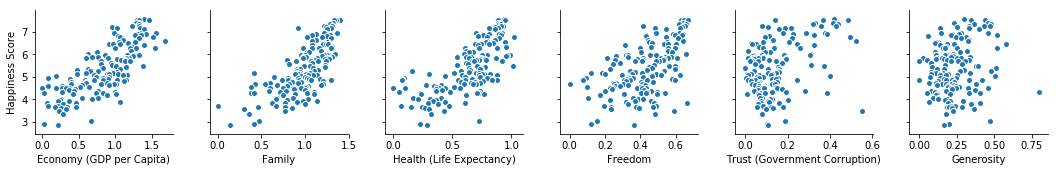

In [39]:
sns.pairplot(df_2015,  x_vars=["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"], y_vars=["Happiness Score"])

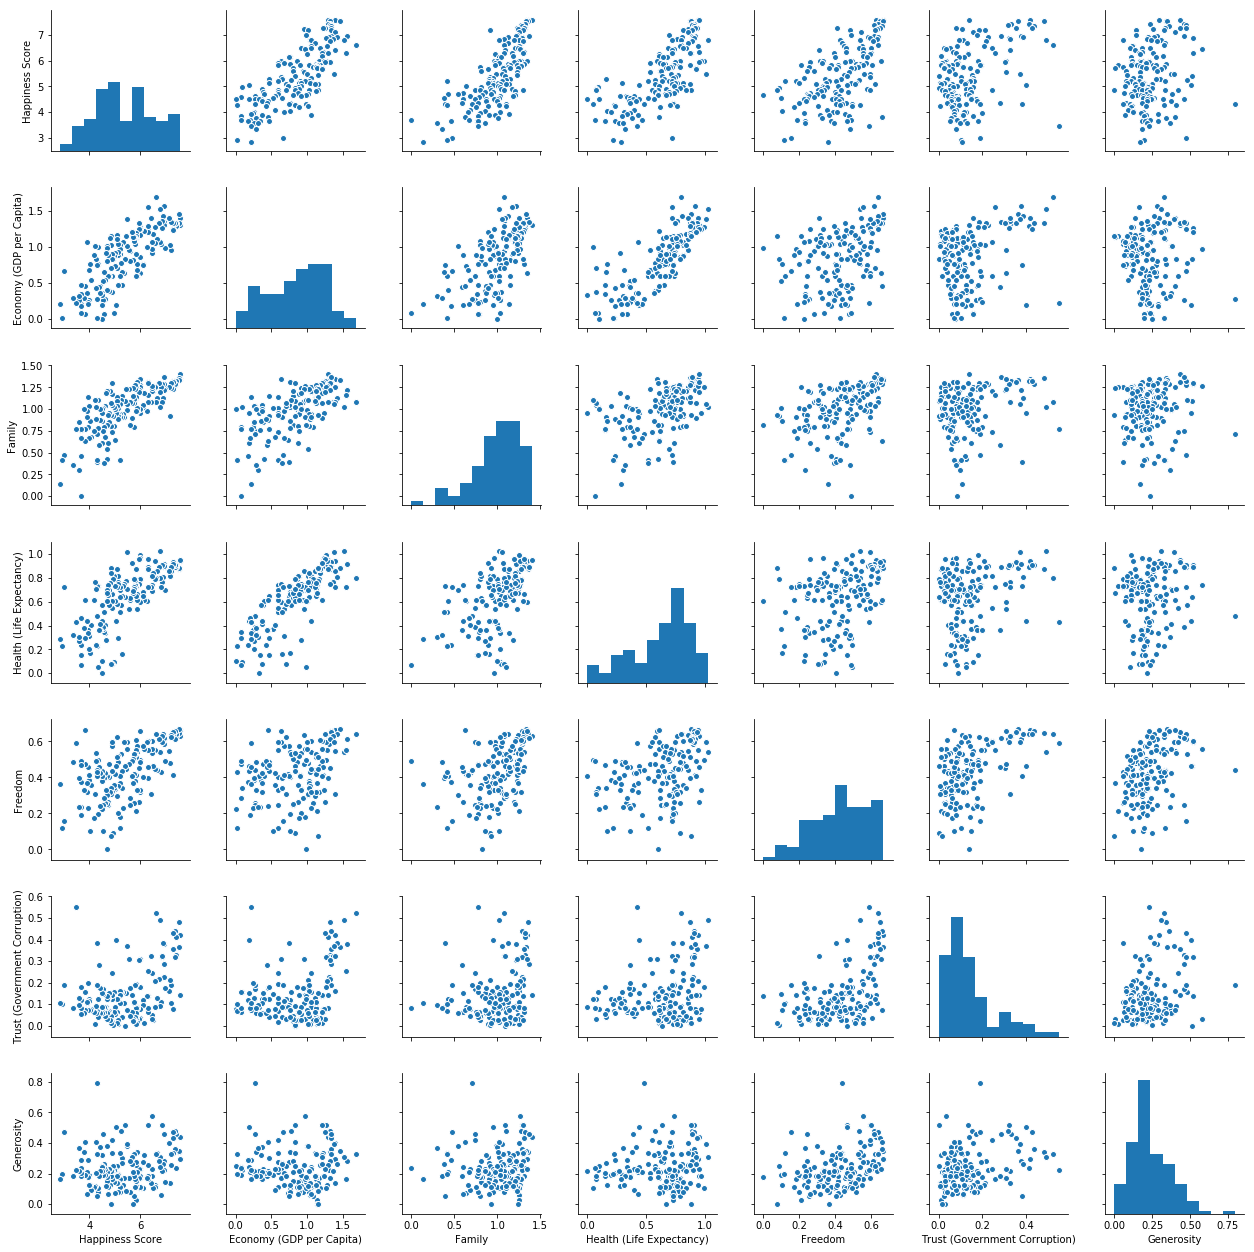

In [42]:
sns.pairplot(df_2015,vars=["Happiness Score","Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"])

### Correlation between variables - Heatmap

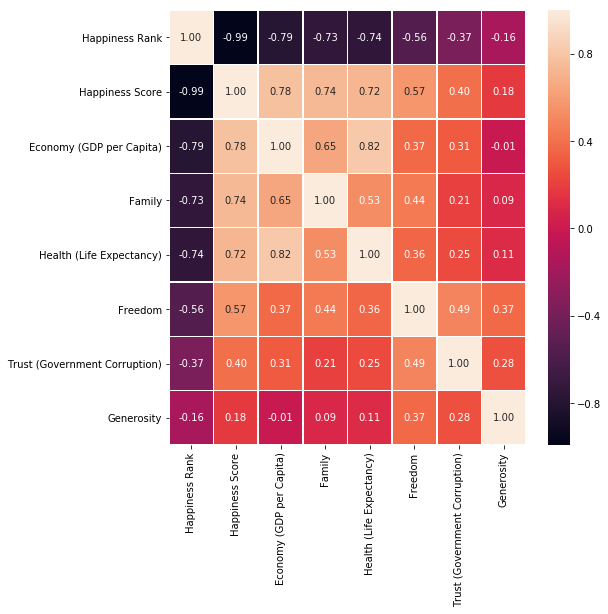

In [43]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_2015.corr(),annot=True,linewidths=.5,fmt=".2f",ax=ax)
plt.show()

### Regression

r-squared: 0.6099071541531226


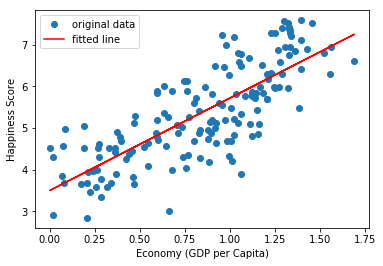

slope: 2.218227119309063


In [54]:
x=df_2015['Economy (GDP per Capita)']
y=df_2015['Happiness Score']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared:", r_value**2)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()
print("slope:",slope)

r-squared: 0.5484960581741372


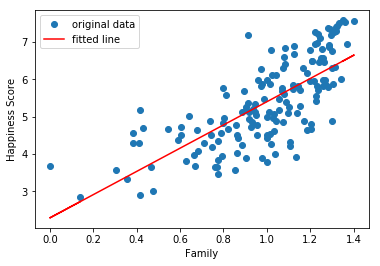

slope: 3.113424027900321


In [55]:
x1=df_2015['Family']
y1=df_2015['Happiness Score']
slope, intercept, r_value, p_value, std_err = stats.linregress(x1, y1)
print("r-squared:", r_value**2)
plt.plot(x1, y1, 'o', label='original data')
plt.plot(x1, intercept + slope*x1, 'r', label='fitted line')
plt.legend()
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.show()
print("slope:",slope)

r-squared: 0.5244650535503466


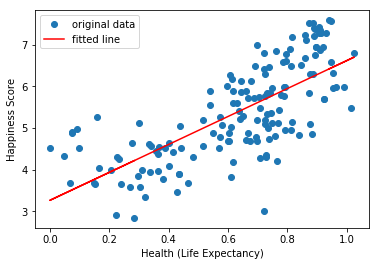

slope: 3.356092652664546


In [56]:
x2=df_2015['Health (Life Expectancy)']
y2=df_2015['Happiness Score']
slope, intercept, r_value, p_value, std_err = stats.linregress(x2, y2)
print("r-squared:", r_value**2)
plt.plot(x2, y2, 'o', label='original data')
plt.plot(x2, intercept + slope*x2, 'r', label='fitted line')
plt.legend()
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.show()
print("slope:",slope)

## Distribution analysis

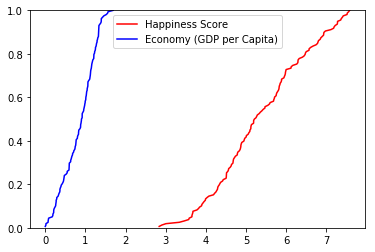

In [80]:
score = df_2015['Happiness Score'] 
gdp = df_2015['Economy (GDP per Capita)'] 
NA = len(score)
X1 = np.sort(score)
F1 = np.array(range(NA+1))/float(NA) 
X2 = np.sort(gdp)
F2 = np.array(range(NA+1))/float(NA) 
plt.plot(X1, F1[1:],'r')
plt.plot(X2, F2[1:],'b')
plt.ylim(0,1)
plt.legend(["Happiness Score", "Economy (GDP per Capita)"])
plt.show()

In [5]:
stats.ks_2samp(X1, X2)

Ks_2sampResult(statistic=1.0, pvalue=4.2009415115968824e-71)

In [7]:
mean_hs=df_2015['Happiness Score'].mean()
mean_gdp=df_2015['Economy (GDP per Capita)'].mean()
st_hs = df_2015['Happiness Score'].std()
st_gdp = df_2015['Economy (GDP per Capita)'].std()
mean_hs, mean_gdp, st_hs, st_gdp

(5.3757341772151905,
 0.8461372151898726,
 1.1450101349520667,
 0.4031207785379101)

In [86]:
def expcdf(t,start, alpha):
    return 1.0 - np.exp(-alpha*(t-start))
#define cumulative normal
def normal_cdf(x, mu=0,sigma=1):
    return (1 + sp.special.erf((x - mu) / np.sqrt(2) / sigma)) / 2  

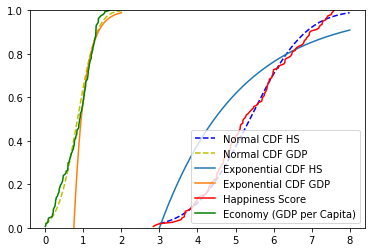

In [105]:
x1 = np.linspace(3, 8, 1000)
x2 = np.linspace(0, 2, 1000)
plt.plot(x1, normal_cdf(x1, mean_hs, st_hs), 'b--')
plt.plot(x2, normal_cdf(x2, mean_gdp, st_gdp), 'y--')
plt.plot(x1, expcdf(x3,0,0.3))
plt.plot(x2, expcdf(x3,3,0.9))
plt.ylim(0, 1)
plt.plot(X1, F1[1:],'r')
plt.plot(X2, F2[1:],'g')
plt.legend(["Normal CDF HS","Normal CDF GDP", "Exponential CDF HS", "Exponential CDF GDP","Happiness Score", "Economy (GDP per Capita)"])
plt.show()

In [66]:
stats.kstest(X1, normal_cdf, args=(mean_hs,st_hs))

KstestResult(statistic=0.056854125821328816, pvalue=0.6938523390178299)

In [23]:
stats.kstest(X2, normal_cdf, args=(mean_gdp,st_gdp))

KstestResult(statistic=0.07646445430109594, pvalue=0.29960865413502535)

In [106]:
stats.kstest(X1, expcdf, args=(0,0.3))

KstestResult(statistic=0.6262023632456635, pvalue=0.0)

In [108]:
stats.kstest(X1, expcdf, args=(3,0.9))

KstestResult(statistic=0.5208688318181468, pvalue=0.0)